# Template Detection

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [34]:
full = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

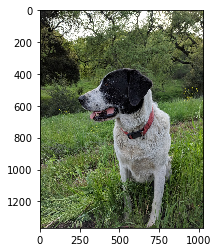

In [35]:
plt.imshow(full)

In [36]:
face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

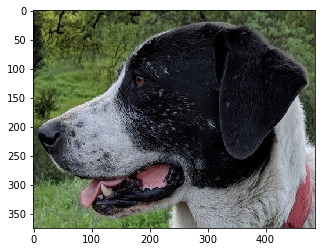

In [37]:
plt.imshow(face)

In [38]:
face.shape

(375, 486, 3)

In [39]:
full.shape

(1367, 1025, 3)

# eval function 

#### 'eval' function will help you to directly map a 'string' to build in function (example : sum)
#### example :
#### mystring = 'sum'
#### myfunction = eval(mystring)
#### myfunction([1,2,3])
#### > output : 6

In [40]:
mystring = 'sum'

In [41]:
myfun = eval(mystring)

In [42]:
myfun([1,2,3])

6

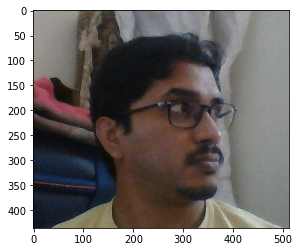

In [72]:
face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/face_kbg.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

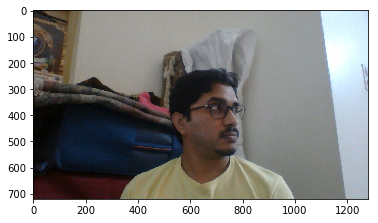

In [73]:
full = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/kbg.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [43]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [65]:
mymethod = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,mymethod)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
top_left = max_loc

In [66]:
#plt.imshow(res)
#min_val
#max_val
#min_loc
max_loc

(406, 176)

In [67]:
height,width,channels = face.shape

In [68]:
top_left[0]+width

919

In [69]:
top_left[1]+height

612

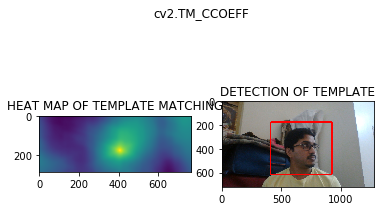

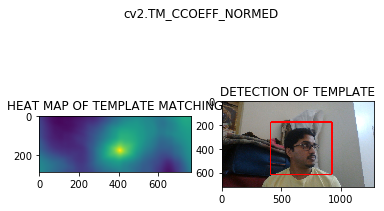

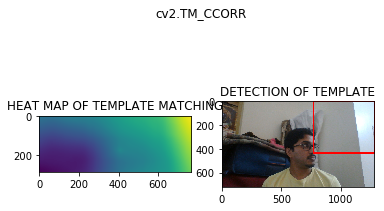

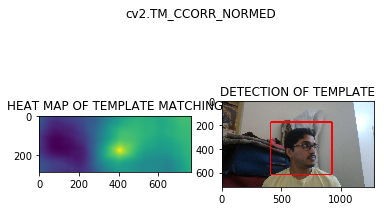

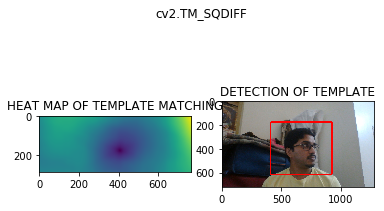

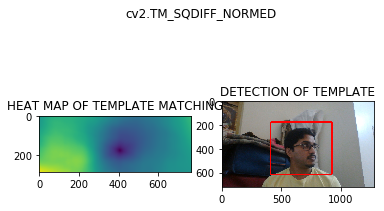

In [74]:
full = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/kbg.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/face_kbg.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)


for m in methods:
    
    #Create a copy of the image
    full_copy = full.copy()
    
    # This eval will convet the string to a cv2.TM_CCOEFF function to be executed in python
    # more like function pointer
    method = eval(m)
    
    #Template matching
    # This will provide a heat map where the image is visible to the closest
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #Let us create the top right of the rectangle
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
        
    #Let us create the bottom right of the rectangle
    
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEAT MAP OF TEMPLATE MATCHING')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    #Title with the method name
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')